In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
Automobiles=pd.read_excel('E:\Python\Data\Automobiles.xlsx','Data')
Automobiles.head()
Automobiles

,,"mileage, highway","mileage,city",Curb Weight,cylinders,Horse Power,Torque,0 to 60 mph,Price as Tested,Displacement,Car Type,ABS Brakes,Company
0,Dodge Stratus ES,29,20,3320,6,168,170,9.4,20485,2.5,1,1,1
1,Ford Taurus SE,28,19,3426,6,200,200,8.7,23000,3.0,1,1,2
2,Cherolet Malibu LS,29,20,3060,6,155,185,8.8,18815,3.1,1,1,13
3,Ford Contour GL,32,24,3020,4,125,130,11.9,18565,2.0,1,3,2
4,Honda Accord LX,30,23,3220,4,150,152,9.4,20015,2.3,1,1,3
5,Mazda 626 LX,31,23,2870,4,125,127,11.4,19800,2.0,1,3,4
6,Nissan Altima GXE,30,22,3220,4,150,154,9.8,19508,2.4,1,3,5
7,Oldsmobile Cutlass GLS,29,20,3220,6,150,180,8.5,19970,3.1,1,1,6
8,Toyota Camry LE,30,23,3180,4,133,147,11.0,21299,2.2,1,1,7
9,BMW 328i,27,19,3320,6,193,206,7.8,38545,2.8,2,1,8


<AxesSubplot:xlabel='Horse Power', ylabel='mileage, highway'>

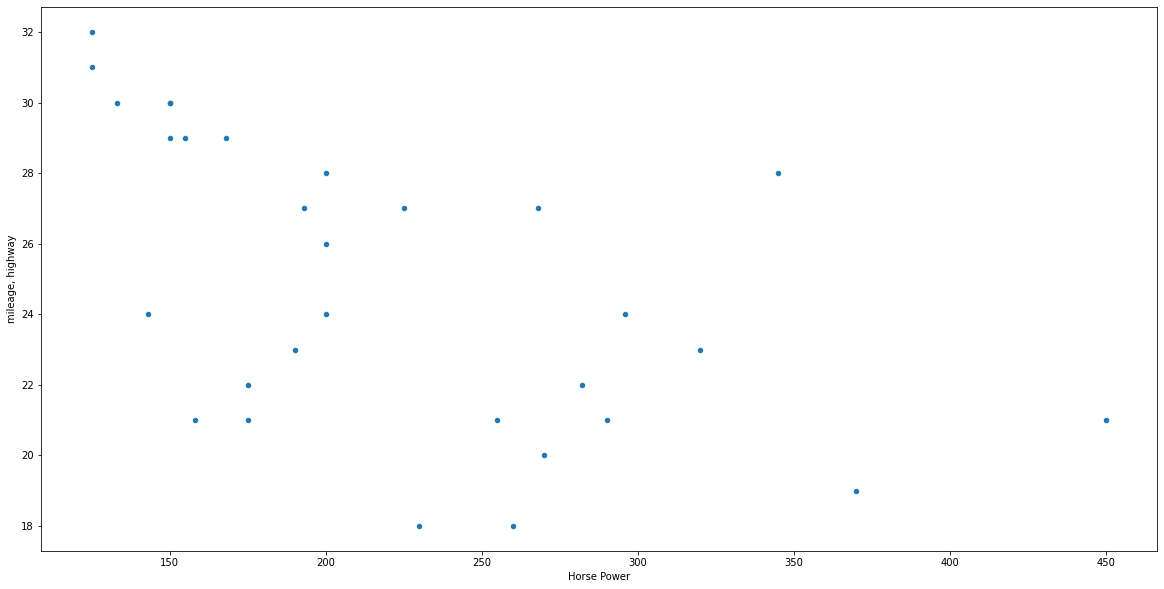

In [16]:
Automobiles.plot.scatter(x='Horse Power',y='mileage, highway',figsize=[20,10])

In [15]:
Automobiles.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,"mileage, highway","mileage,city",Curb Weight,cylinders,Horse Power,Torque,0 to 60 mph,Price as Tested,Displacement,Car Type,ABS Brakes,Company
"mileage, highway",1.000000,0.910916,-0.744080,-0.730390,-0.637028,-0.775599,0.309217,-0.526262,-0.781523,-0.789496,0.079757,-0.111273
"mileage,city",0.910916,1.000000,-0.805108,-0.821433,-0.703070,-0.855285,0.369268,-0.616171,-0.818260,-0.725130,0.110345,-0.087443
Curb Weight,-0.744080,-0.805108,1.000000,0.644383,0.451861,0.639279,-0.053810,0.348397,0.584086,0.417807,-0.158909,0.062417
cylinders,-0.730390,-0.821433,0.644383,1.000000,0.845057,0.921586,-0.578914,0.622463,0.914170,0.755423,-0.259779,0.244462
Horse Power,-0.637028,-0.703070,0.451861,0.845057,1.000000,0.908443,-0.803946,0.879511,0.768648,0.838729,-0.327177,0.429502
Torque,-0.775599,-0.855285,0.639279,0.921586,0.908443,1.000000,-0.659466,0.733867,0.906651,0.863441,-0.233654,0.342692
0 to 60 mph,0.309217,0.369268,-0.053810,-0.578914,-0.803946,-0.659466,1.000000,-0.783122,-0.524691,-0.596804,0.471076,-0.415980
Price as Tested,-0.526262,-0.616171,0.348397,0.622463,0.879511,0.733867,-0.783122,1.000000,0.516316,0.715208,-0.405064,0.409350
Displacement,-0.781523,-0.818260,0.584086,0.914170,0.768648,0.906651,-0.524691,0.516316,1.000000,0.821909,-0.173976,0.248799
Car Type,-0.789496,-0.725130,0.417807,0.755423,0.838729,0.863441,-0.596804,0.715208,0.821909,1.000000,-0.107454,0.361776


In [13]:
#producing spearman correlation
from scipy.stats import spearmanr
data1= Automobiles['cylinders']
data2= Automobiles['mileage, highway']
stat,p=spearmanr(data1,data2)
print('Spearman Correlation=%.3f, p-value=%.3f'%(stat,p))

Spearman Correlation=-0.730, p-value=0.000


In [7]:
#Conducting hypothesis test to test either exists relationship
print('H0 - ρ = 0 (There are no correlation between variables)')
print('H1 - ρ ≠ 0 (There exists correlation between variables)')
cofidence_level=0.95
#calculate alpha (significance level)
alpha=round((1-cofidence_level),2)
print()
print('Significance level, α: ',alpha)
print()
if p< alpha:
    print('Using significance level of',alpha, 'and p-value =', p,'.H0 is rejected.')
    print('There EXISTS correlation between variables')
else:
    print('Using significance level of',alpha,'and p-value =', p,'.H0 is accepted.')
    print('There are NO correlation between variables')

H0 - ρ = 0 (There are no correlation between variables)
H1 - ρ ≠ 0 (There exists correlation between variables)

Significance level, α:  0.05

Using significance level of 0.05 and p-value = 0.0001535091146166254 .H0 is rejected.
There EXISTS correlation between variables


In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import scipy.stats as st
import math 

#iniate constant_b0
X=Automobiles['Horse Power']
X=sm.add_constant(X)
y=Automobiles['mileage, highway']
#Simple regression analysis
model=sm.OLS(y,X)
results = model.fit()
#can change your alpha level
alpha=0.05
#summary of the model

print(results.summary(alpha))
#print the regression equation
print('y_hat =',round(results.params[1],4),'x +',round(results.params[0],4))
print('MSR Value:',(results.mse_model).round(2))
MSE = results.mse_resid
print('MSE Value:',MSE.round(2))
RMSE = math.sqrt(MSE)
print('RMSE Value:%.3f'%RMSE)

                            OLS Regression Results                            
Dep. Variable:                   0.05   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     12.09
Date:                Wed, 03 Aug 2022   Prob (F-statistic):            0.00167
Time:                        15:22:37   Log-Likelihood:                -79.569
No. Observations:                  30   AIC:                             163.1
Df Residuals:                      28   BIC:                             165.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          31.1658      1.933     16.121      

In [9]:
print("Predicted values: ",  results.predict().round(2))

Predicted values:  [26.37 25.45 26.74 27.6  26.88 27.6  26.88 26.88 27.37 25.65 25.45 25.45
 24.74 23.51 26.17 26.17 26.65 27.08 25.74 23.45 24.6  23.88 23.74 22.88
 23.11 22.03 21.31 18.31 20.6  22.71]
